# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:

The input layer is what receives input from our data. Each input node in an input layer receives a different features of the dataset that will propagate down the rest of the network.
### Hidden Layer:

The layer between the input and output layers. They are hidden because the data can only access them through the input layer. 

### Output Layer:

The output layer is the final layer in the network. It outputs a vector of values that is in a format that is suitable from the type of problem that we're trying to address. This is also where the ouput layer gets modified by an activation function to transform it into a context-specific format.

### Neuron:

A single node in the neural network. It's called a neuron because it receives inputs and propagates a signal to the next neuron if a certain threshold is reached.

### Weight:

A negative weight decreases the output, a positive weight increasese it. You can tune the output value by changing the weight.

### Activation Function:

Each node in a given layer has the same activation function. The activation function decides the extent to which a signal gets propagated to downstream neurons. Activation functions are sometimes referred to as transfer functions because they decide how much of the signal to pass onto the next layer.

### Node Map:

A visual diagram of the architecture of a neural network. It shows the path from from inputs to outputs.

### Perceptron:

A neuron (artificial) which takes in several binary inputs and produces a single binary output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The flow of information through a neural network is as follows:

1. The data gets passed into the inputs. Each input node receives a weight term and the whole layer receives a bias term where applicable. Each layer in a feed-forward neural network affects the next layer by a weighted sum of inputs plus a bias term.
2. The inputs propagate the data to the hidden layer(s).
3. The data is processed and propagated to the hidden layer(s) which take it further to the output layer.
4. The final layer, the output layer, modifies the output using an activation function and transforms it into the final value of our model. Depending on the specific use case of our NN, activation functions can do the following:
  * There often is **no activation function** for a single node neural network regression problem because what we want is an unbounded continuous value.
  * Binary classification problems might use a **sigmoid activation function** to squishify values down to represent probability outputs where outputs represent the classes of interest.
  * Multiclass classfication provlems usually have multiple output nodes in the output layer and would most likely involve a **softmax activation function**.
  
  

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [178]:
def NAND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([1.5, -1, -1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1
      
input = [(0,0), (1,0), (0,1), (1,1)]

for x in input:
  y = NAND(x[0], x[1])
  print(str(x), str(y))

(0, 0) 1
(1, 0) 1
(0, 1) 1
(1, 1) 0


In [0]:
# Training data

import numpy as np
np.random.seed(42)

inputs = np.array([
    [0,0,0],
    [1,0,0],
    [0,1,0],
    [1,1,0]
])

correct_outputs = [[1],[1],[1],[0]]

In [180]:
# Sigmoid activation function and its derivate for updating weights
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Initialize random weights for our two inputs
weights = 2 * np.random.random((3, 1)) - 1
print('Weights:\n', weights)

# Calculate the weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
print('Weighted sum:\n', weighted_sum)

# Output the activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
print('Activated value for 1 training epoch:\n', activated_output)

# Take the difference of output and true values to calculate the error
error = correct_outputs - activated_output
print('Error:\n', error)

# Gradient descent/backpropagation
adjustments = error * sigmoid_derivative(activated_output)
print('Adjustments with GD/backprop:\n', adjustments)

# Update the weights
weights += np.dot(inputs.T, adjustments)
print('Updated weights:\n', weights)

Weights:
 [[-0.25091976]
 [ 0.90142861]
 [ 0.46398788]]
Weighted sum:
 [[ 0.        ]
 [-0.25091976]
 [ 0.90142861]
 [ 0.65050885]]
Activated value for 1 training epoch:
 [[0.5       ]
 [0.43759713]
 [0.71124299]
 [0.65712512]]
Error:
 [[ 0.5       ]
 [ 0.56240287]
 [ 0.28875701]
 [-0.65712512]]
Adjustments with GD/backprop:
 [[ 0.11750186]
 [ 0.1340789 ]
 [ 0.0637777 ]
 [-0.147749  ]]
Updated weights:
 [[-0.26458986]
 [ 0.81745731]
 [ 0.46398788]]


In [181]:
# This might be wrong

for iteration in range(10000):
  # Weighted sum of inputs/weights
  weighted_sum = np.dot(inputs, weights)
  
  # Activate!
  activated_output = sigmoid(weighted_sum)
  
  # Calculate error
  error = correct_outputs - activated_output
  
  # Calculate weight adjustments
  adjustments = error * sigmoid(activated_output)
  
  # Update weights
  weights += np.dot(inputs.T, adjustments)
  
print('Weights after training')
print(weights)

print('Output after training')
print(activated_output)

Weights after training
[[-4.99600361e-16]
 [ 6.10622664e-16]
 [ 4.63987884e-01]]
Output after training
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv')
df.columns, df.dtypes, df.shape

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'), Id                 int64
 SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 Species           object
 dtype: object, (150, 6))

In [143]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [0]:
# Set X and y
y = df.iloc[0:100, 5].values
y = np.where(y == 'Iris-versicolor', -1, 1)
# pick two of the most relevant features...
X = df.iloc[0:100, [1,3]].values

In [168]:
y.shape, X.shape

((100,), (100, 2))

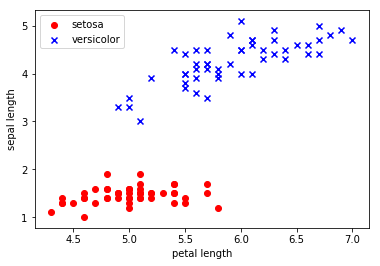

In [169]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [0]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

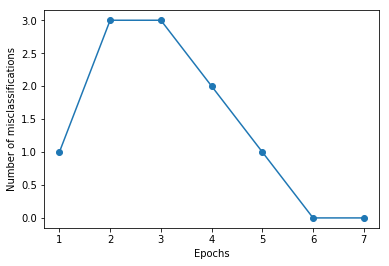

In [171]:
pn = Perceptron(0.1, 7)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


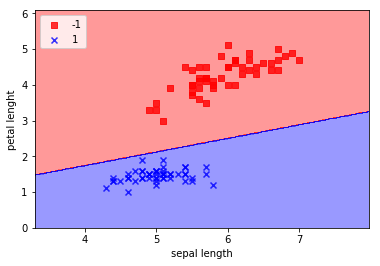

In [173]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length')
plt.ylabel('petal lenght')
plt.legend(loc='upper left')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?